In [1]:
#pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')
#from apyori import apriori

In [3]:
# Load the dataset
df = pd.read_csv('teleco_market_basket.csv')


In [4]:
# Retrieve row from data
df.iloc[1]

Item01               Logitech M510 Wireless mouse
Item02                                  HP 63 Ink
Item03                                  HP 65 ink
Item04                 nonda USB C to USB Adapter
Item05                  10ft iPHone Charger Cable
Item06                               HP 902XL ink
Item07               Creative Pebble 2.0 Speakers
Item08        Cleaning Gel Universal Dust Cleaner
Item09              Micro Center 32GB Memory card
Item10    YUNSONG 3pack 6ft Nylon Lightning Cable
Item11               TopMate C5 Laptop Cooler pad
Item12                  Apple USB-C Charger cable
Item13               HyperX Cloud Stinger Headset
Item14                TONOR USB Gaming Microphone
Item15             Dust-Off Compressed Gas 2 pack
Item16             3A USB Type C Cable 3 pack 6FT
Item17                      HOVAMP iPhone charger
Item18                   SanDisk Ultra 128GB card
Item19       FEEL2NICE 5 pack 10ft Lighning cable
Item20        FEIYOLD Blue light Blocking Glasses


In [5]:
df

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14997,Falcon Dust Off Compressed Gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14999,HP 63XL Ink,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(15002, 20)

In [7]:
df = df[df['Item01'].notna()]

In [8]:
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Item01  7501 non-null   object
 1   Item02  5747 non-null   object
 2   Item03  4389 non-null   object
 3   Item04  3345 non-null   object
 4   Item05  2529 non-null   object
 5   Item06  1864 non-null   object
 6   Item07  1369 non-null   object
 7   Item08  981 non-null    object
 8   Item09  654 non-null    object
 9   Item10  395 non-null    object
 10  Item11  256 non-null    object
 11  Item12  154 non-null    object
 12  Item13  87 non-null     object
 13  Item14  47 non-null     object
 14  Item15  25 non-null     object
 15  Item16  8 non-null      object
 16  Item17  4 non-null      object
 17  Item18  4 non-null      object
 18  Item19  3 non-null      object
 19  Item20  1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [9]:
df.shape

(7501, 20)

In [10]:
df

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
1,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UNEN Mfi Certified 5-pack Lightning Cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cat8 Ethernet Cable,HP 65 ink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit,Moread HDMI to VGA Adapter,HP 62XL Tri-Color ink,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,SanDisk 32GB Ultra SDHC card,Vsco 70 pack stickers,SanDisk 128GB microSDXC card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,Apple Lightning to Digital AV Adapter,Nylon Braided Lightning to USB cable,Apple Pencil,USB 2.0 Printer cable,ARRIS SURFboard SB8200 Cable Modem,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,Falcon Dust Off Compressed Gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,HP 63XL Ink,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Checking for null values
df.isna().any()

Item01    False
Item02     True
Item03     True
Item04     True
Item05     True
Item06     True
Item07     True
Item08     True
Item09     True
Item10     True
Item11     True
Item12     True
Item13     True
Item14     True
Item15     True
Item16     True
Item17     True
Item18     True
Item19     True
Item20     True
dtype: bool

In [12]:
df.head()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
1,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UNEN Mfi Certified 5-pack Lightning Cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cat8 Ethernet Cable,HP 65 ink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit,Moread HDMI to VGA Adapter,HP 62XL Tri-Color ink,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data_list = [
    [str(df.values[row, cell]) for cell in range(len(df.columns)) if not pd.isnull(df.iloc[row, cell])]
    for row in range(len(df))
]
print(data_list[1])

['Apple Lightning to Digital AV Adapter', 'TP-Link AC1750 Smart WiFi Router', 'Apple Pencil']


In [14]:
te = TransactionEncoder()
data_array = te.fit(data_list).transform(data_list)
# Generate a new dataframe from this temporary array
data = pd.DataFrame(data_array, columns=te.columns_)
# Check that the new dataframe looks how we'd expect
data

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
for col in data.columns: 
    print(col)

10ft iPHone Charger Cable
10ft iPHone Charger Cable 2 Pack
3 pack Nylon Braided Lightning Cable
3A USB Type C Cable 3 pack 6FT
5pack Nylon Braided USB C cables
ARRIS SURFboard SB8200 Cable Modem
Anker 2-in-1 USB Card Reader
Anker 4-port USB hub
Anker USB C to HDMI Adapter
Apple Lightning to Digital AV Adapter
Apple Lightning to USB cable
Apple Magic Mouse 2
Apple Pencil
Apple Pencil 2nd Gen
Apple Power Adapter Extension Cable
Apple USB-C Charger cable
AutoFocus 1080p Webcam
BENGOO G90000 headset
Blue Light Blocking Glasses
Blue Light Blocking Glasses 2pack
Brother Genuine High Yield Toner Cartridge
Cat 6 Ethernet Cable 50ft
Cat8 Ethernet Cable
CicTsing MM057 2.4G Wireless Mouse
Cleaning Gel Universal Dust Cleaner
Creative Pebble 2.0 Speakers
DisplayPort ot HDMI adapter
Dust-Off Compressed Gas
Dust-Off Compressed Gas 2 pack
FEEL2NICE 5 pack 10ft Lighning cable
FEIYOLD Blue light Blocking Glasses
Falcon Dust Off Compressed Gas
HOVAMP Mfi 6pack Lightning Cable
HOVAMP iPhone charger
HP 61 

In [16]:
# export file to csv
data.to_csv('cleaned_teleco.csv', index = False)
data.columns

Index(['10ft iPHone Charger Cable', '10ft iPHone Charger Cable 2 Pack',
       '3 pack Nylon Braided Lightning Cable',
       '3A USB Type C Cable 3 pack 6FT', '5pack Nylon Braided USB C cables',
       'ARRIS SURFboard SB8200 Cable Modem', 'Anker 2-in-1 USB Card Reader',
       'Anker 4-port USB hub', 'Anker USB C to HDMI Adapter',
       'Apple Lightning to Digital AV Adapter',
       ...
       'hP 65 Tri-color ink', 'iFixit Pro Tech Toolkit', 'iPhone 11 case',
       'iPhone 12 Charger cable', 'iPhone 12 Pro case', 'iPhone 12 case',
       'iPhone Charger Cable Anker 6ft', 'iPhone SE case',
       'nonda USB C to USB Adapter', 'seenda Wireless mouse'],
      dtype='object', length=119)

In [17]:
data = pd.read_csv( 'cleaned_teleco.csv')
data.head()

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


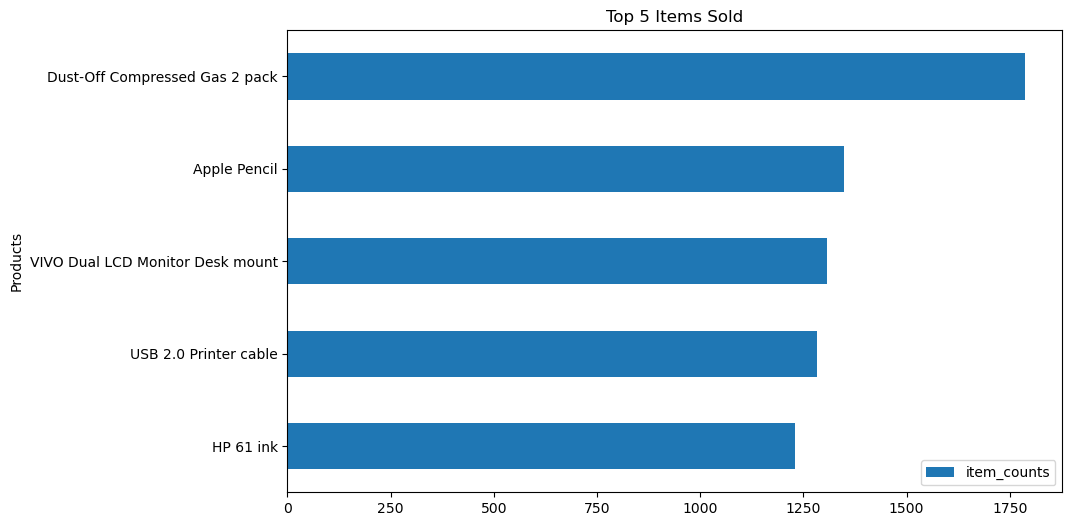

In [18]:
item_counts = data.loc[:,:].sum()
sorted_items = item_counts.sort_values(ascending=False).head(5)
sorted_items = sorted_items.to_frame()
sorted_items = sorted_items.reset_index()
sorted_items = sorted_items.rename(columns ={'index': 'Products', 0: 'item_counts'})
##top_five_items = sorted_items.head(5)
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
ax =sorted_items.plot.barh(x = 'Products', y= 'item_counts')
#plt.xlabel('Products')
#plt.ylabel('item_counts')
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.title('Top 5 Items Sold')
plt.gca().invert_yaxis()

In [19]:
# Checking for null values
data.isna().any()

10ft iPHone Charger Cable               False
10ft iPHone Charger Cable 2 Pack        False
3 pack Nylon Braided Lightning Cable    False
3A USB Type C Cable 3 pack 6FT          False
5pack Nylon Braided USB C cables        False
                                        ...  
iPhone 12 case                          False
iPhone Charger Cable Anker 6ft          False
iPhone SE case                          False
nonda USB C to USB Adapter              False
seenda Wireless mouse                   False
Length: 119, dtype: bool

In [20]:
frequent_itemsets = apriori(data, min_support=0.02, use_colnames=True)
frequent_itemsets.head(5)

,support,itemsets
0,0.050527,(10ft iPHone Charger Cable 2 Pack)
1,0.042528,(3A USB Type C Cable 3 pack 6FT)
2,0.029463,(Anker 2-in-1 USB Card Reader)
3,0.068391,(Anker USB C to HDMI Adapter)
4,0.087188,(Apple Lightning to Digital AV Adapter)


In [21]:
rules = association_rules(frequent_itemsets, metric= 'lift', min_threshold=1)

# Print the length of the list 
print(len(rules))

94


In [22]:
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Dust-Off Compressed Gas 2 pack),(10ft iPHone Charger Cable 2 Pack),0.238368,0.050527,0.023064,0.096756,1.914955,0.011020,1.051182,0.627330
1,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
2,(Dust-Off Compressed Gas 2 pack),(Anker USB C to HDMI Adapter),0.238368,0.068391,0.024397,0.102349,1.496530,0.008095,1.037830,0.435627
3,(Anker USB C to HDMI Adapter),(Dust-Off Compressed Gas 2 pack),0.068391,0.238368,0.024397,0.356725,1.496530,0.008095,1.183991,0.356144
4,(VIVO Dual LCD Monitor Desk mount),(Anker USB C to HDMI Adapter),0.174110,0.068391,0.020931,0.120214,1.757755,0.009023,1.058905,0.521973
5,(Anker USB C to HDMI Adapter),(VIVO Dual LCD Monitor Desk mount),0.068391,0.174110,0.020931,0.306043,1.757755,0.009023,1.190117,0.462740
6,(Apple Lightning to Digital AV Adapter),(Apple Pencil),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424
7,(Apple Pencil),(Apple Lightning to Digital AV Adapter),0.179709,0.087188,0.028796,0.160237,1.837830,0.013128,1.086988,0.555754
8,(Dust-Off Compressed Gas 2 pack),(Apple Lightning to Digital AV Adapter),0.238368,0.087188,0.024397,0.102349,1.173883,0.003614,1.016889,0.194486
9,(Apple Lightning to Digital AV Adapter),(Dust-Off Compressed Gas 2 pack),0.087188,0.238368,0.024397,0.279817,1.173883,0.003614,1.057552,0.162275


In [31]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Dust-Off Compressed Gas 2 pack),(10ft iPHone Charger Cable 2 Pack),0.238368,0.050527,0.023064,0.096756,1.914955,0.011020,1.051182,0.627330
1,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
2,(Dust-Off Compressed Gas 2 pack),(Anker USB C to HDMI Adapter),0.238368,0.068391,0.024397,0.102349,1.496530,0.008095,1.037830,0.435627
3,(Anker USB C to HDMI Adapter),(Dust-Off Compressed Gas 2 pack),0.068391,0.238368,0.024397,0.356725,1.496530,0.008095,1.183991,0.356144
4,(VIVO Dual LCD Monitor Desk mount),(Anker USB C to HDMI Adapter),0.174110,0.068391,0.020931,0.120214,1.757755,0.009023,1.058905,0.521973
...,...,...,...,...,...,...,...,...,...,...
89,(VIVO Dual LCD Monitor Desk mount),(Screen Mom Screen Cleaner kit),0.174110,0.129583,0.035462,0.203675,1.571779,0.012900,1.093043,0.440468
90,(USB 2.0 Printer cable),(Stylus Pen for iPad),0.170911,0.095054,0.020131,0.117785,1.239135,0.003885,1.025766,0.232768
91,(Stylus Pen for iPad),(USB 2.0 Printer cable),0.095054,0.170911,0.020131,0.211781,1.239135,0.003885,1.051852,0.213256
92,(Stylus Pen for iPad),(VIVO Dual LCD Monitor Desk mount),0.095054,0.174110,0.025197,0.265077,1.522468,0.008647,1.123778,0.379218


In [23]:
top_three_rules = rules.sort_values('confidence', ascending=False).head(3)
top_three_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
37,(FEIYOLD Blue light Blocking Glasses),(Dust-Off Compressed Gas 2 pack),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962,0.461536
53,(SanDisk Ultra 64GB card),(Dust-Off Compressed Gas 2 pack),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369


In [24]:
top_three_rules = rules.sort_values('lift', ascending=False).head(3)
top_three_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
84,(VIVO Dual LCD Monitor Desk mount),(SanDisk Ultra 64GB card),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716,0.682343
85,(SanDisk Ultra 64GB card),(VIVO Dual LCD Monitor Desk mount),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
64,(FEIYOLD Blue light Blocking Glasses),(VIVO Dual LCD Monitor Desk mount),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186


In [25]:
top_three_rules = rules.sort_values('support', ascending=False).head(3)
top_three_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
62,(Dust-Off Compressed Gas 2 pack),(VIVO Dual LCD Monitor Desk mount),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
63,(VIVO Dual LCD Monitor Desk mount),(Dust-Off Compressed Gas 2 pack),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
41,(HP 61 ink),(Dust-Off Compressed Gas 2 pack),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965


In [26]:
sortedrule = rules[(rules['lift'] > 1.9)]
sortedrule.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Dust-Off Compressed Gas 2 pack),(10ft iPHone Charger Cable 2 Pack),0.238368,0.050527,0.023064,0.096756,1.914955,0.011020,1.051182,0.627330
1,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
64,(FEIYOLD Blue light Blocking Glasses),(VIVO Dual LCD Monitor Desk mount),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186


In [27]:
# Filter rules based on lift and confidence criteria
filtered_rules = rules[(rules['lift'] > 1.9) & (rules['confidence'] > 0.3)]

# Sort the filtered rules by lift in descending order
top_3_rules = filtered_rules.sort_values(by='lift', ascending=False)

# Display the top 3 rules
top_3_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
85,(SanDisk Ultra 64GB card),(VIVO Dual LCD Monitor Desk mount),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
64,(FEIYOLD Blue light Blocking Glasses),(VIVO Dual LCD Monitor Desk mount),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186
1,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221


In [28]:
# Get value counts for antecedents
antecedents_counts = rules.antecedents.value_counts().reset_index()
antecedents_counts.columns = ['antecedents', 'antecedents_count']

# Get value counts for consequents
consequents_counts = rules.consequents.value_counts().reset_index()
consequents_counts.columns = ['consequents', 'consequents_count']

# Merge the two DataFrames on their respective columns
combined_counts = pd.merge(antecedents_counts, consequents_counts, left_on='antecedents', right_on='consequents', how='outer')

# Fill NaN values with 0 for consequents_count if there is no match
combined_counts['consequents_count'].fillna(0, inplace=True)

# Drop the redundant 'consequents' column
combined_counts.drop('consequents', axis=1, inplace=True)

# Display the combined counts DataFrame
combined_counts

,antecedents,antecedents_count,consequents_count
0,(Dust-Off Compressed Gas 2 pack),18,18
1,(VIVO Dual LCD Monitor Desk mount),12,12
2,(Apple Pencil),9,9
3,(HP 61 ink),8,8
4,(Screen Mom Screen Cleaner kit),7,7
5,(USB 2.0 Printer cable),6,6
6,(Nylon Braided Lightning to USB cable),5,5
7,(Apple Lightning to Digital AV Adapter),4,4
8,(Apple USB-C Charger cable),4,4
9,(Stylus Pen for iPad),4,4


In [29]:
data.head()

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
# Filter rules with 'Premium Nylon USB Cable' as either antecedent or consequent
pnuc_data = pd.concat([rules[rules['antecedents'] == {'Premium Nylon USB Cable'}], rules[rules['consequents'] == {'Premium Nylon USB Cable'}]])

# Display the data for rules involving 'Premium Nylon USB Cable'
pnuc_data


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
48,(Premium Nylon USB Cable),(Dust-Off Compressed Gas 2 pack),0.051060,0.238368,0.020131,0.394256,1.653978,0.00796,1.257349,0.416672
49,(Dust-Off Compressed Gas 2 pack),(Premium Nylon USB Cable),0.238368,0.051060,0.020131,0.084452,1.653978,0.00796,1.036472,0.519145
